In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

PREPROCESSING DATA

In [22]:
# Load the CSV file into a DataFrame
training_dataset = pd.read_csv('./dataset/customer_churn_dataset-training-master.csv')
testing_dataset = pd.read_csv('./dataset/customer_churn_dataset-testing-master.csv')
# Display the first 5 rows of the DataFrame
# print(df1.head())
# print(df1.columns)
df = pd.concat([training_dataset, testing_dataset], ignore_index=True)

df.head(50)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [23]:
#List of the columns

print(f'List of Columns: {df.columns}')
# #Inspect the churn column
# df['Churn']
#Print the shape to understand the size of the dataset and print the data types of all the features
print(df.shape)
print(df.dtypes)

List of Columns: Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')
(505207, 12)
CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object


Gender, Subscription Type, and Contract Length are objects so these will need to be converted to be a numerical value

In [24]:
#Check for null values
nan_count = np.sum(df.isnull(), axis=0)
nan_count

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [25]:
row_nan_count = np.sum(df.isnull(), axis=1)
row_nan_count

0         0
1         0
2         0
3         0
4         0
         ..
505202    0
505203    0
505204    0
505205    0
505206    0
Length: 505207, dtype: int64

After looking through the dataset, row 199295 has missing values for all the columns. Therefore, we can remove this row.

In [26]:
df.iloc[199295]

CustomerID           NaN
Age                  NaN
Gender               NaN
Tenure               NaN
Usage Frequency      NaN
Support Calls        NaN
Payment Delay        NaN
Subscription Type    NaN
Contract Length      NaN
Total Spend          NaN
Last Interaction     NaN
Churn                NaN
Name: 199295, dtype: object

DROPPING NULL ROW

In [27]:
#Drop row 199295
df.drop(199295, inplace=True)

In [28]:
#Ensure that row 199295 was removed
df.iloc[199295]

CustomerID           204107.0
Age                      36.0
Gender                 Female
Tenure                   46.0
Usage Frequency          24.0
Support Calls             7.0
Payment Delay             1.0
Subscription Type       Basic
Contract Length       Monthly
Total Spend             118.9
Last Interaction         27.0
Churn                     1.0
Name: 199296, dtype: object

In [29]:
#Recheck for null values
nan_count = np.sum(df.isnull(), axis=0)
nan_count

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [30]:
#Identifying correlations with the label
# df.corr()
# corr_matrix = round(df.corr(),5)
# corrs = corr_matrix['Churn']
# corrs_sorted = corrs.sort_values(ascending=False)
# corrs_sorted


In [31]:
#List the different values for the columns with object type
print(df['Gender'].unique())
print(df['Subscription Type'].unique())
print(df['Contract Length'].unique())


['Female' 'Male']
['Standard' 'Basic' 'Premium']
['Annual' 'Monthly' 'Quarterly']


In [32]:
df.drop(columns=["CustomerID", "Gender"], inplace=True)

Perform one hot encoding on any object types

In [33]:
#Perform one-hot encoding on any object types
# df_gender = pd.get_dummies(df['Gender'], prefix='Gender')
# df = df.join(df_gender) #adds the one hot encoding cols to df
# df.drop(columns='Gender', inplace=True) #drops the original object type 

df_subscription_type = pd.get_dummies(df['Subscription Type'], prefix='Subscription Type')
df = df.join(df_subscription_type)
df.drop(columns='Subscription Type', inplace=True)

df_contract_length = pd.get_dummies(df['Contract Length'], prefix='Contract Length')
df = df.join(df_contract_length)
df.drop(columns='Contract Length', inplace=True)

In [34]:
#Identifying correlations with churn without dropping columns yet 
corr_matrix = round(df.corr(),5)
corrs = corr_matrix['Churn']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted



Churn                         1.00000
Support Calls                 0.51628
Contract Length_Monthly       0.36650
Payment Delay                 0.32978
Age                           0.19122
Last Interaction              0.12715
Subscription Type_Basic       0.01911
Subscription Type_Standard   -0.00793
Subscription Type_Premium    -0.01101
Tenure                       -0.02131
Usage Frequency              -0.05326
Contract Length_Annual       -0.15271
Contract Length_Quarterly    -0.15635
Total Spend                  -0.36968
Name: Churn, dtype: float64

In [35]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [36]:
# df.drop(columns=["CustomerID", "Gender"],inplace=True) #after dropping columns
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,False,False,True,True,False,False
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,True,False,False,False,True,False
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,True,False,False,False,False,True
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,False,False,True,False,True,False
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,True,False,False,False,True,False


In [ ]:
df[df['Age']>50].sample(n=100)
#gets the dataframe of all rows where age is above 50
age_above_50_and_churn = df[(df['Age']>50)&(df['Churn']==1)]
print(f'age above 50 and churn count: {age_above_50_and_churn.shape[0]}') #92958

age_above_50_and_no_churn = df[(df['Age']>50)&(df['Churn']==0)]
print(f'age above 50 and no churn count: {age_above_50_and_no_churn.shape[0]}')#10054



age above 50 and churn count: 92958
age above 50 and no churn count: 10054


In [38]:
#Normalize the numerical features by scaling values between 0 and 1
# scaler = MinMaxScaler()
# df = scaler.fit_transform(df)
# df_norm_test = pd.DataFrame(df_norm_test, columns=df_testing.columns)
df.shape

(505206, 14)

Spltting the concatenated data into 80/20 training and testing


In [39]:
#Spltting the concatenated data into 80/20 training and testing
from sklearn.model_selection import train_test_split
y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1234)

Logistic Regression

In [40]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
lg_loss = log_loss(y_test, probabilities)
acc_score = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
# print('Log loss=' + str(lg_loss) + ', accuracy score: ' + str(acc_score), ', recall : ' + recall)
print(f'Log Loss: {lg_loss}, accuracy score: {acc_score}, precision: {precision}, recall: {recall}')
print('F1 Score: ' + str((2*precision*recall)/(precision+recall)))


Log Loss: 0.3998664766318378, accuracy score: 0.8427881475030186, precision: 0.8709916177858372, recall: 0.8407937982280652
F1 Score: 0.8556263462604634


In [41]:
#get the coefficients from the logistic regression model
coefficients = model.coef_[0]
feature_names = X_train.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(coef_df)

                       Feature  Coefficient
0                          Age     0.023260
1                       Tenure    -0.001176
2              Usage Frequency    -0.013589
3                Support Calls     0.408387
4                Payment Delay     0.084721
5                  Total Spend    -0.003191
6             Last Interaction     0.025615
7      Subscription Type_Basic    -0.138747
8    Subscription Type_Premium    -0.211764
9   Subscription Type_Standard    -0.202423
10      Contract Length_Annual    -0.886958
11     Contract Length_Monthly     1.238399
12   Contract Length_Quarterly    -0.904375


Stratifying the 80/20 training and testing split
Stratify sampling will maintain the same proportion of Churn/No-Churn in 

In [ ]:
y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=1234)
#stratify param


In [43]:
#Checking imbalance: 
y_train.value_counts(normalize=True)



Churn
1.0    0.555203
0.0    0.444797
Name: proportion, dtype: float64

<Figure size 600x300 with 0 Axes>

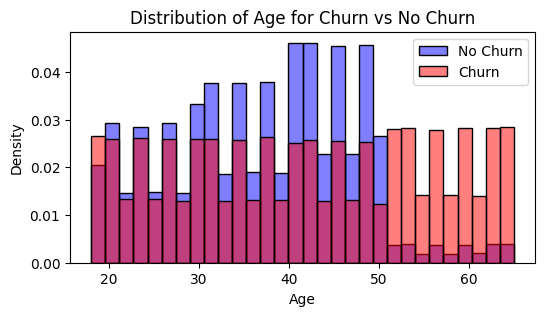

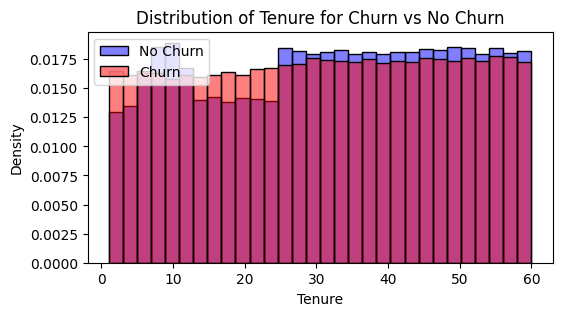

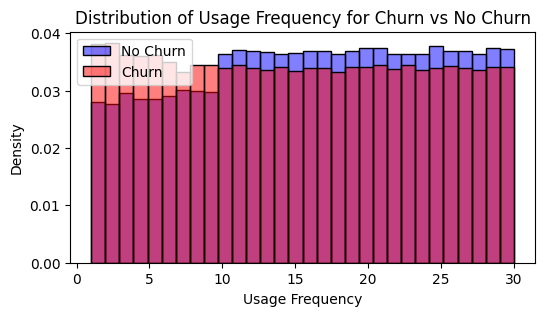

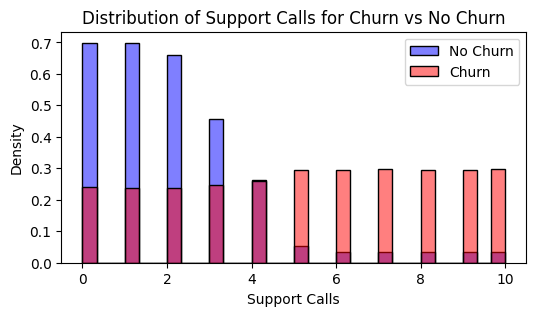

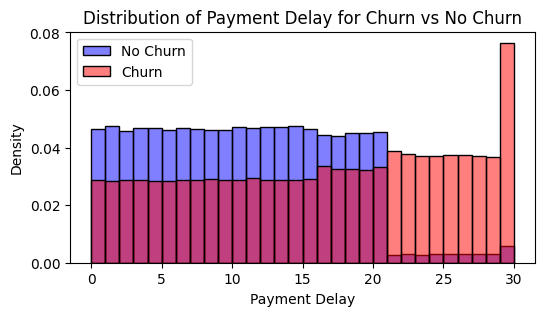

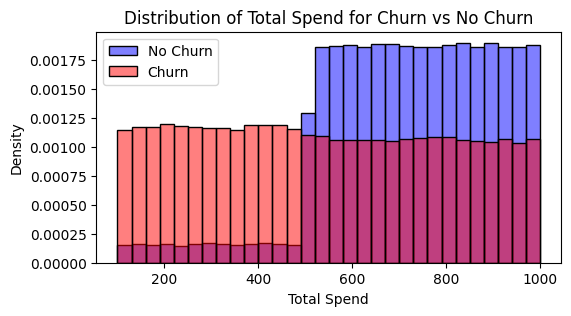

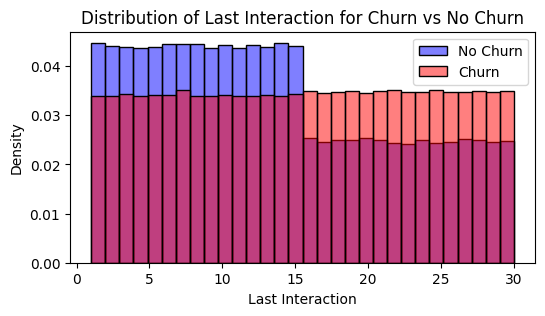

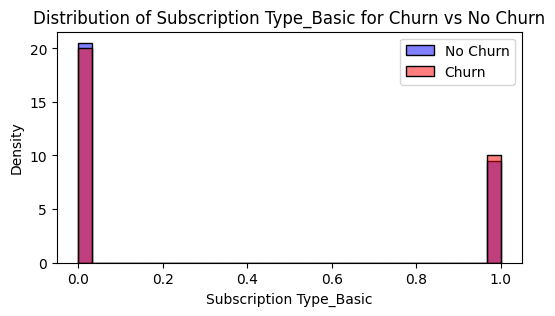

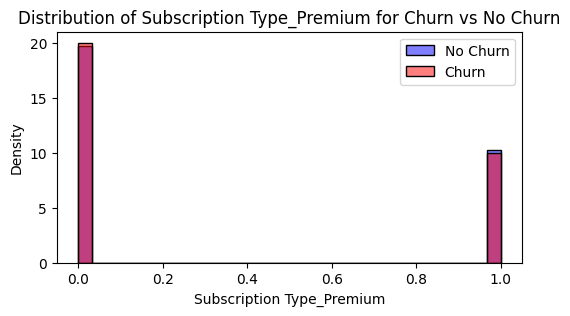

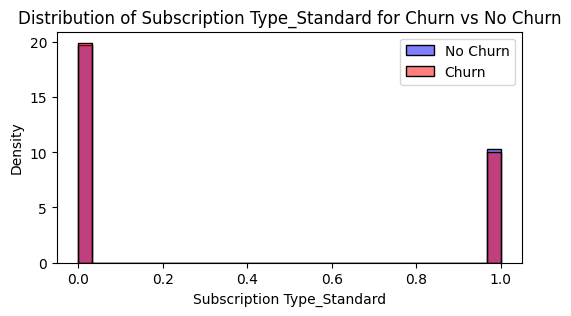

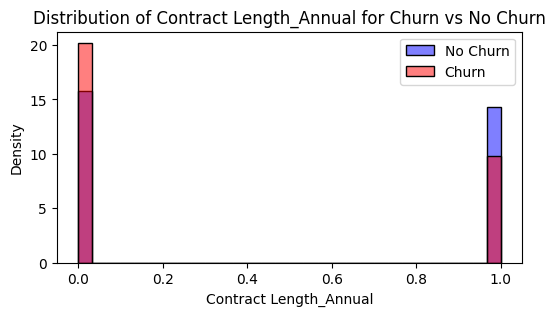

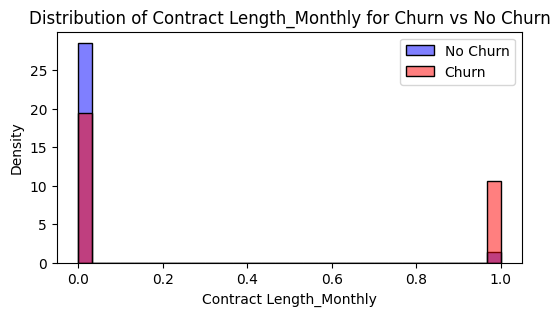

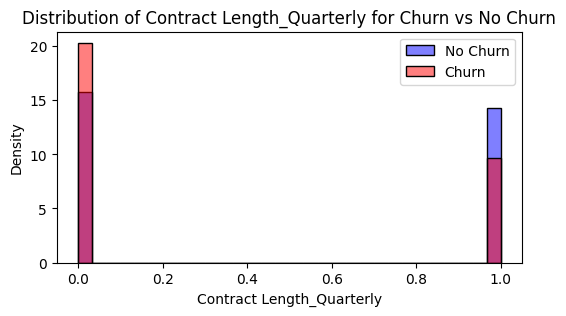

In [44]:
#Histograms of churn and no churn in the newly split training dataset
y_train_named = y_train.rename('Churn')
training_data = pd.concat([X_train, y_train_named], axis=1)

plt.figure(figsize=(6, 3))

features = training_data.drop(columns=['Churn']).columns

for feature in features:
    plt.figure(figsize=(6, 3))
    
    sns.histplot(training_data[training_data['Churn'] == 0][feature], color='blue', label='No Churn', kde=False, stat="density", bins=30, alpha=0.5)
    sns.histplot(training_data[training_data['Churn'] == 1][feature], color='red', label='Churn', kde=False, stat="density", bins=30, alpha=0.5)
    
    plt.title(f'Distribution of {feature} for Churn vs No Churn')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    
    plt.show()

<Figure size 600x300 with 0 Axes>

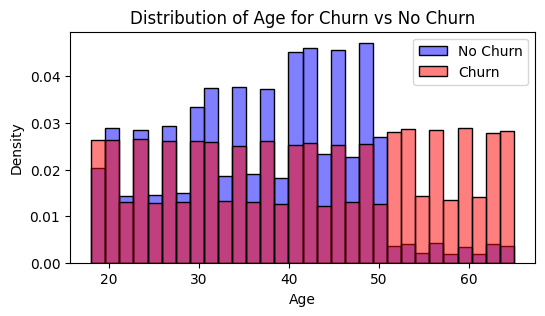

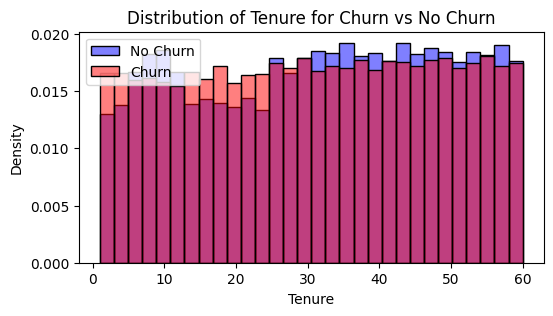

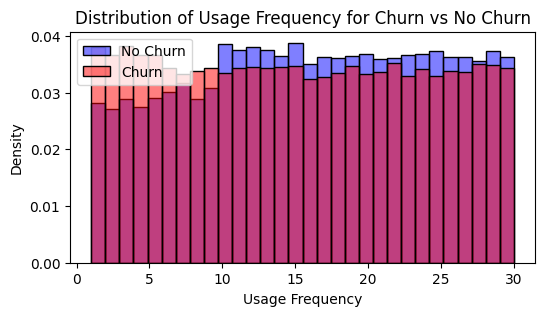

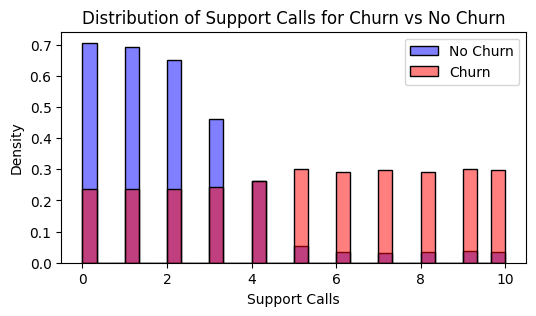

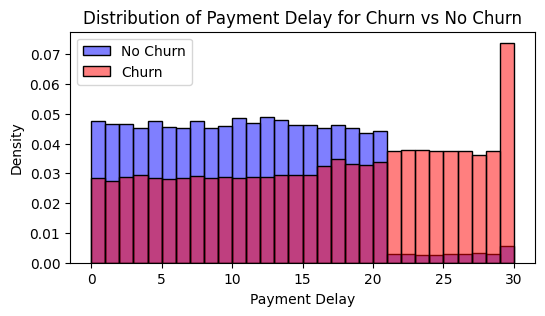

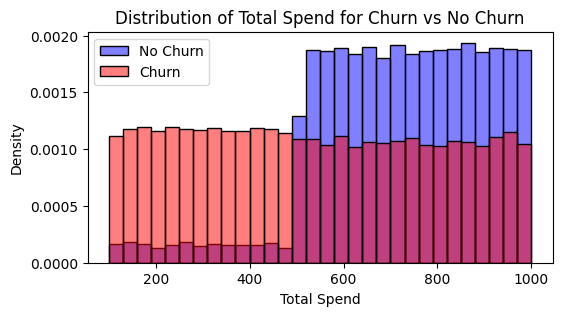

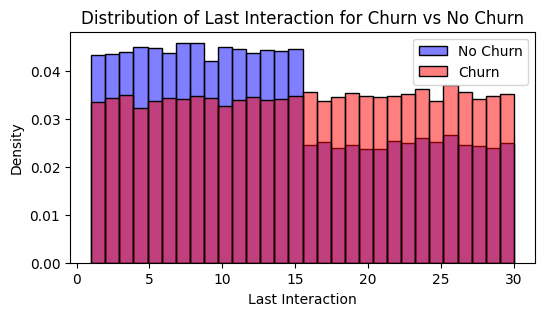

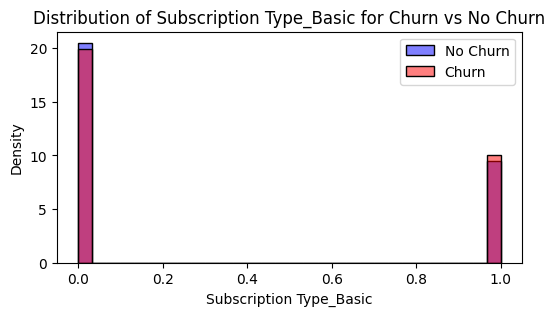

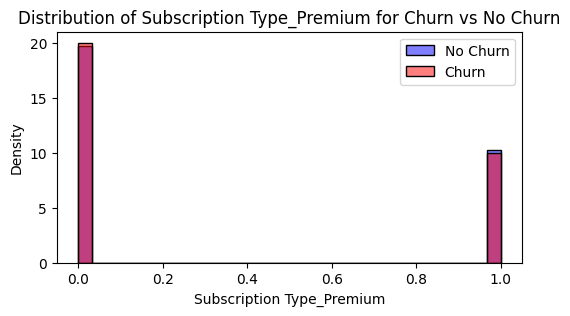

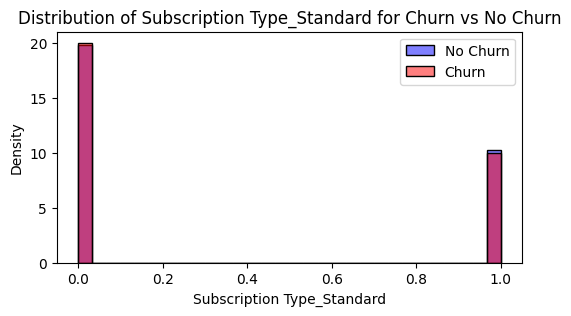

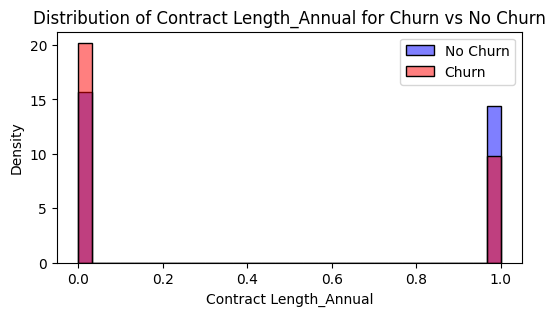

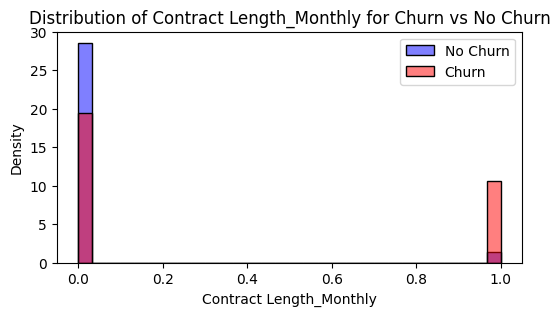

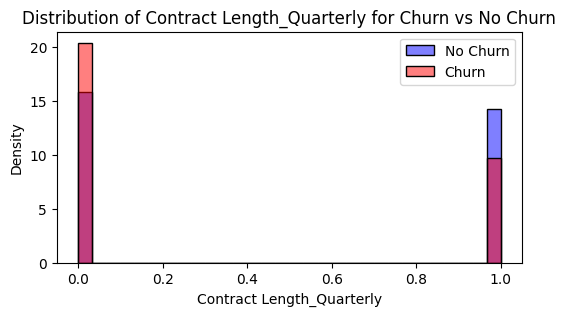

In [45]:
#Histograms of churn and no churn in the newly split testing dataset
y_test_named = y_test.rename('Churn')
testing_data = pd.concat([X_test, y_test_named], axis=1)

plt.figure(figsize=(6, 3))

features = testing_data.drop(columns=['Churn']).columns

for feature in features:
    plt.figure(figsize=(6, 3))
    
    sns.histplot(testing_data[testing_data['Churn'] == 0][feature], color='blue', label='No Churn', kde=False, stat="density", bins=30, alpha=0.5)
    sns.histplot(testing_data[testing_data['Churn'] == 1][feature], color='red', label='Churn', kde=False, stat="density", bins=30, alpha=0.5)
    
    plt.title(f'Distribution of {feature} for Churn vs No Churn')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    
    plt.show()

Below are the different models we trained using the concatenated training and testing set as well as stratified sampling implemented into the train_test_split()

Logistic Regression with Stratisfied Sampling

In [46]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
lg_loss = log_loss(y_test, probabilities)
acc_score = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
# print('Log loss=' + str(lg_loss) + ', accuracy score: ' + str(acc_score), ', recall : ' + recall)
print(f'Log Loss: {lg_loss}, accuracy score: {acc_score}, precision: {precision}, recall: {recall}')
print('F1 Score: ' + str((2*precision*recall)/(precision+recall)))


Log Loss: 0.3948581584296442, accuracy score: 0.8462322598523386, precision: 0.8728536235614223, recall: 0.8463252464393305
F1 Score: 0.8593847574054465


In [47]:
#Get the coefficients from the logistic regression model
coefficients = model.coef_[0]
feature_names = X_train.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(coef_df)

                       Feature  Coefficient
0                          Age     0.023289
1                       Tenure    -0.001062
2              Usage Frequency    -0.013165
3                Support Calls     0.406598
4                Payment Delay     0.084000
5                  Total Spend    -0.003194
6             Last Interaction     0.025499
7      Subscription Type_Basic    -0.138903
8    Subscription Type_Premium    -0.207558
9   Subscription Type_Standard    -0.202371
10      Contract Length_Annual    -0.885798
11     Contract Length_Monthly     1.232081
12   Contract Length_Quarterly    -0.895115


Decision tree

In [48]:
#This function will be called for each model to calculate the evaluation metrics
def get_stats(y_test, y_pred, probabilities):
    acc_score = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    lg_loss = log_loss(y_test, probabilities)
    print(f'Log Loss: {lg_loss}, accuracy score: {acc_score}, precision: {precision}, recall: {recall}')
    print('F1 Score: ' + str((2*precision*recall)/(precision+recall)))

In [49]:
from sklearn.tree import DecisionTreeClassifier
y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

dt = DecisionTreeClassifier(criterion='log_loss', max_depth=7, min_samples_leaf=4, random_state=1234)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
probabilities = dt.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)




Log Loss: 0.25030197159778755, accuracy score: 0.9198250223917895, precision: 0.8987265009096422, recall: 0.9642503810262306
F1 Score: 0.9303361510744966


Fine-tuning Decision Tree

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],  # Testing different tree depths
    'min_samples_leaf': [2, 4]  # Minimum samples required at leaf nodes
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model using grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'{best_params}, {best_model}')

{'max_depth': 7, 'min_samples_leaf': 4}, DecisionTreeClassifier(criterion='log_loss', max_depth=7, min_samples_leaf=4,
                       random_state=1234)


In [51]:
feature_names = X.columns
feature_names

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Subscription Type_Basic',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Annual', 'Contract Length_Monthly',
       'Contract Length_Quarterly'],
      dtype='object')

In [52]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

text_representation = tree.export_text(dt, feature_names=feature_names)
print(text_representation)

|--- Support Calls <= 4.50
|   |--- Total Spend <= 500.01
|   |   |--- Payment Delay <= 20.50
|   |   |   |--- Usage Frequency <= 2.50
|   |   |   |   |--- Contract Length_Annual <= 0.50
|   |   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |   |--- Tenure <= 51.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Tenure >  51.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Age >  23.50
|   |   |   |   |   |   |--- Tenure <= 54.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Tenure >  54.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Contract Length_Annual >  0.50
|   |   |   |   |   |--- Total Spend <= 315.00
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Total Spend >  315.00
|   |   |   |   |   |   |--- Tenure <= 8.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Tenure >  8.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- Us

In [53]:
fig = plt.figure(figsize=(200,50))
_ = tree.plot_tree(dt,
                   feature_names=feature_names,
                   class_names=['No Churn','Churn'],
                   filled=True)

Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

rf = RandomForestClassifier(criterion='log_loss', n_estimators=20)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
probabilities = rf.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)

Log Loss: 0.4477679025324977, accuracy score: 0.9276336950658888, precision: 0.8984100022049276, recall: 0.9805342388833926
F1 Score: 0.9376773918602175


Fine-tuning Random Forest

In [55]:
#This turns out to be the best performing Random Forest model
from sklearn.ensemble import RandomForestClassifier

y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
probabilities = rf.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)

Log Loss: 0.2281998668843068, accuracy score: 0.9290390582087558, precision: 0.8983140533543907, recall: 0.9835200584685865
F1 Score: 0.9389880699126943


In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 5, 15] 
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model using grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'{best_params}, {best_model}')

{'max_depth': None, 'n_estimators': 150}, RandomForestClassifier(n_estimators=150)


Hist Gradient Boosting Classifier

In [57]:
#Intial HGBC with all default parameters
from sklearn.ensemble import HistGradientBoostingClassifier

y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train, y_train)

y_pred = hgbc.predict(X_test)
probabilities = hgbc.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)

Log Loss: 0.21437385060289732, accuracy score: 0.9295536982329043, precision: 0.8982899241321548, recall: 0.98459851867697
F1 Score: 0.9394660974427446


Fine-tuning Hist Gradient Boosting Classifier

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_iter': [50, 100, 150],  
    'learning_rate': [0.1, 0.5, 1] 
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=hgbc, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model using grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'{best_params}, {best_model}')

{'learning_rate': 0.1, 'max_iter': 100}, HistGradientBoostingClassifier()


In [59]:
#Best performance for HGBC
y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

hgbc = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1)
hgbc.fit(X_train, y_train)

y_pred = hgbc.predict(X_test)
probabilities = hgbc.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)

Log Loss: 0.2138131495705171, accuracy score: 0.9298456574773731, precision: 0.8982804297300372, recall: 0.9852045954882929
F1 Score: 0.9397367067515123


In [61]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 5.0/124.9 MB 25.2 MB/s eta 0:00:05
   --- ------------------------------------ 10.5/124.9 MB 26.2 MB/s eta 0:00:05
   ----- ---------------------------------- 17.0/124.9 MB 28.3 MB/s eta 0:00:04
   ------- -------------------------------- 23.6/124.9 MB 29.3 MB/s eta 0:00:04
   --------- ------------------------------ 29.6/124.9 MB 29.4 MB/s eta 0:00:04
   ---------- ----------------------------- 31.7/124.9 MB 26.5 MB/s eta 0:00:04
   ----------- ---------------------------- 37.0/124.9 MB 26.4 MB/s eta 0:00:04
   ------------- -------------------------- 43.0/124.9 MB 26.6 MB/s eta 0:00:04
   --------------- ------------------------ 48.5/124.9 MB 26.9 MB/s eta 0:00:03
   ----------------- ---------------------- 54.5/124.9 MB 26.9 MB/s eta 0:00:03
   ------------------- -------------------- 60.8/124


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


XGBoost

In [62]:
import xgboost as xgb

y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

xgb_clf = xgb.XGBClassifier(
    objective='binary:hinge',
    eval_metric='auc',
    # 'objective': 'binary:logistic',
    # 'eval_metric': 'auc',
    # 'eta': 0.1,
    # 'max_depth': 6,
    # 'min_child_weight': 1,
    # 'subsample': 0.8,
    # 'colsample_bytree': 0.8,
    # 'lambda': 1.0,
    # 'alpha': 0.0,
    # 'n_estimators': 500
)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
probabilities = xgb_clf.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)

Log Loss: 1.1402013775616786, accuracy score: 0.9284798820286714, precision: 0.8980712214511453, recall: 0.982717897983012
F1 Score: 0.9384897582234253
